In [8]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
## load gene lists
with open('../genes.json', 'r') as file:
    marker_genes = json.load(file)

#### Proteomics

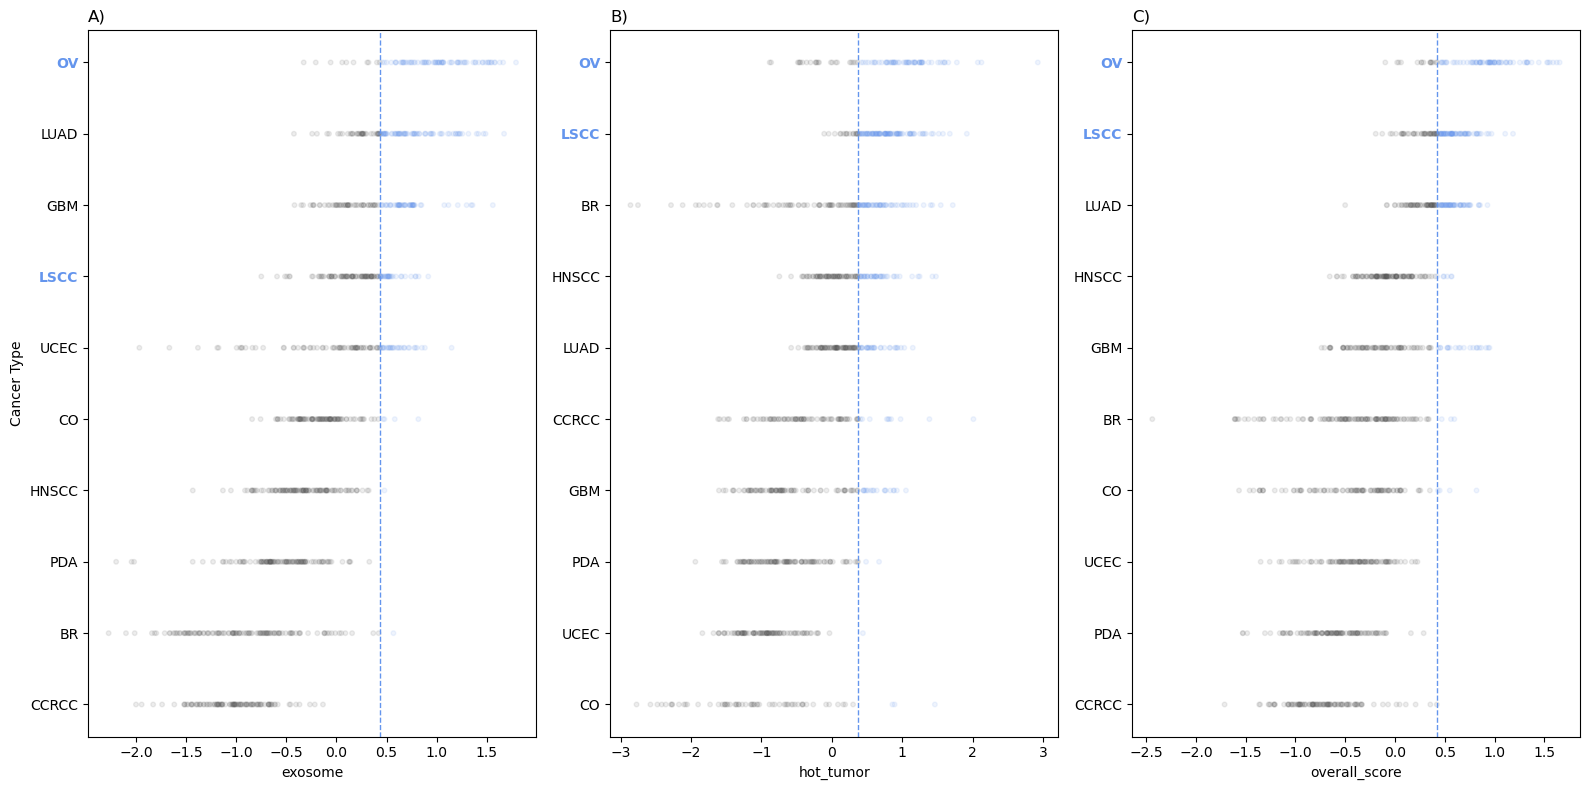

In [10]:
## read proteomics data
data = pd.read_csv('./data/proteomics_data.tsv', sep='\t')

## store gene score column names
columns = list(marker_genes.keys()) + ['overall_score']

## calculate median and 80th percentile values
median_values = {}
percentile_80_values = {}
for col in columns:
    median_values[col] = data.groupby('tumor_code')[col].median()
    percentile_80_values[col] = median_values[col].quantile(0.8)

## sort cancer types by median overall score
median_overall_sorted = median_values['overall_score'].sort_values(ascending=True)
top_cancer_types = median_overall_sorted[median_overall_sorted > percentile_80_values['overall_score']]

## highlight top cancer types across all plots
def highlight_labels(ax):
    labels = ax.get_yticklabels()
    for label in labels:
        if label.get_text() in top_cancer_types:
            label.set_color('cornflowerblue')
            label.set_fontweight('bold')

## create figure with subplots for each column
fig, axes = plt.subplots(1, len(columns), sharey=False, figsize=(16, 8))

## plot scatter plots dynamically
def plot_scatter(ax, data_col, median_values, percentile_80, xlabel):

    ## sort by median values for the individual plot
    cancer_types_sorted = median_values.sort_values(ascending=True).index
    data_sorted = data.set_index('tumor_code').loc[cancer_types_sorted]
    
    ## apply color logic
    data_sorted['color'] = np.where(data_sorted[data_col] >= percentile_80, 'cornflowerblue', '#4f4f4f')
    
    ## scatter
    ax.scatter(data_sorted[data_col], data_sorted.index, c=data_sorted['color'], s=11, alpha=0.1)
    ax.axvline(x=percentile_80, color='cornflowerblue', linestyle='--', linewidth=1, label='80th Percentile')
    ax.set_xlabel(xlabel)
    ax.set_yticks(range(len(cancer_types_sorted)))
    ax.set_yticklabels(cancer_types_sorted)
    highlight_labels(ax)

## plot each column
for i, col in enumerate(columns):
    plot_scatter(axes[i], col, median_values[col], percentile_80_values[col], col)
    if i == 0:
        axes[i].set_ylabel('Cancer Type')
    axes[i].set_title(f'{chr(65 + i)})', loc='left')

## adjust layout
plt.tight_layout()

## save figure
plt.savefig('./figures/figure_1_proteomics.png')
plt.show()

#### Transcriptomics

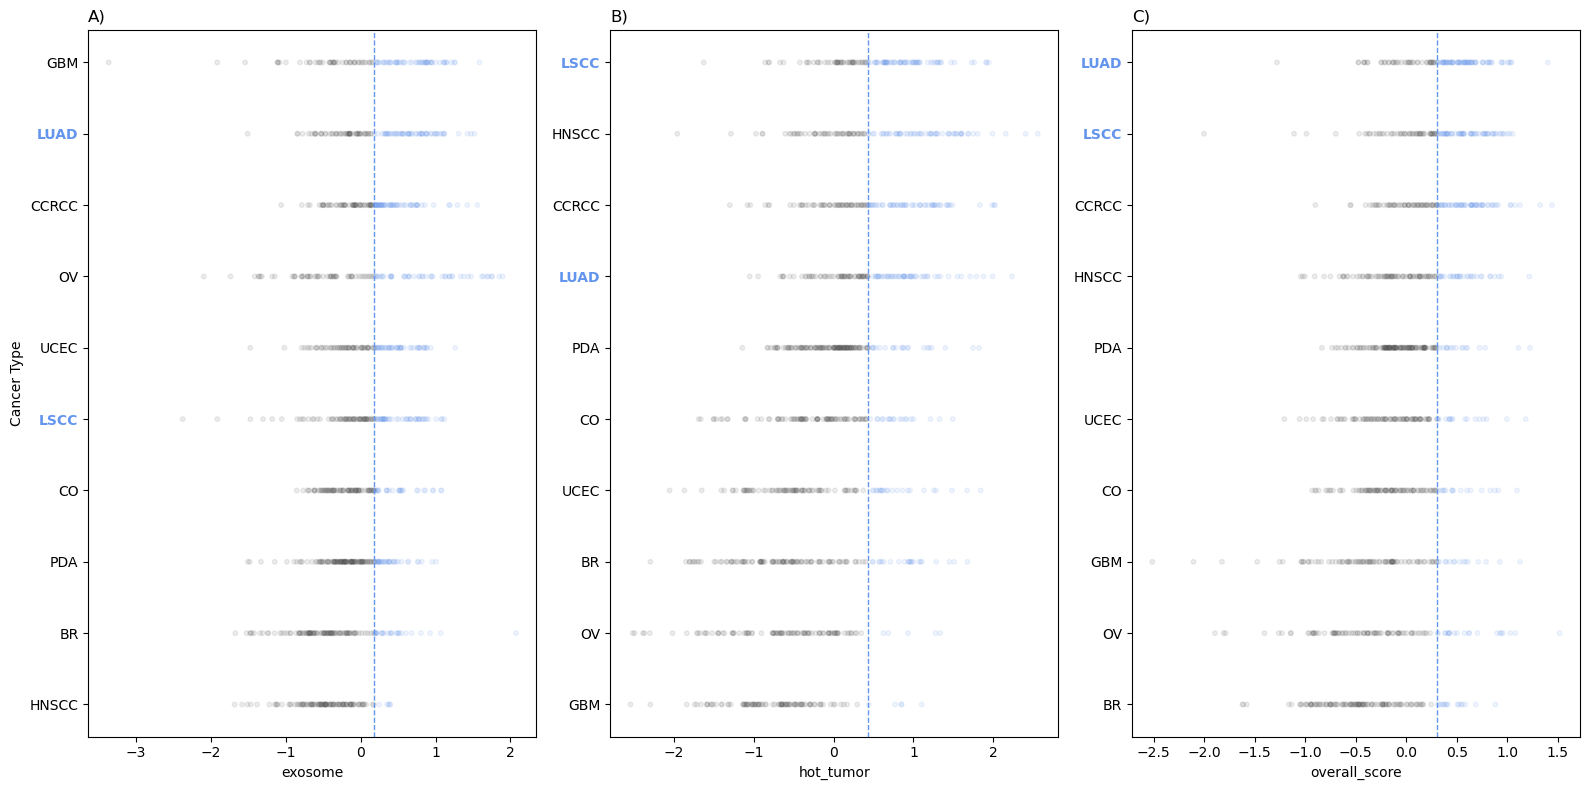

In [11]:
## read transcriptomics data
data = pd.read_csv('./data/transcriptomics_data.tsv', sep='\t')

## store gene score column names
columns = list(marker_genes.keys()) + ['overall_score']

## calculate median and 80th percentile values
median_values = {}
percentile_80_values = {}
for col in columns:
    median_values[col] = data.groupby('tumor_code')[col].median()
    percentile_80_values[col] = median_values[col].quantile(0.8)

## sort cancer types by median overall score
median_overall_sorted = median_values['overall_score'].sort_values(ascending=True)
top_cancer_types = median_overall_sorted[median_overall_sorted > percentile_80_values['overall_score']]

## highlight top cancer types across all plots
def highlight_labels(ax):
    labels = ax.get_yticklabels()
    for label in labels:
        if label.get_text() in top_cancer_types:
            label.set_color('cornflowerblue')
            label.set_fontweight('bold')

## create figure with subplots for each column
fig, axes = plt.subplots(1, len(columns), sharey=False, figsize=(16, 8))

## plot scatter plots dynamically
def plot_scatter(ax, data_col, median_values, percentile_80, xlabel):

    ## sort by median values for the individual plot
    cancer_types_sorted = median_values.sort_values(ascending=True).index
    data_sorted = data.set_index('tumor_code').loc[cancer_types_sorted]
    
    ## apply color logic
    data_sorted['color'] = np.where(data_sorted[data_col] >= percentile_80, 'cornflowerblue', '#4f4f4f')
    
    ## scatter
    ax.scatter(data_sorted[data_col], data_sorted.index, c=data_sorted['color'], s=11, alpha=0.1)
    ax.axvline(x=percentile_80, color='cornflowerblue', linestyle='--', linewidth=1, label='80th Percentile')
    ax.set_xlabel(xlabel)
    ax.set_yticks(range(len(cancer_types_sorted)))
    ax.set_yticklabels(cancer_types_sorted)
    highlight_labels(ax)

## plot each column
for i, col in enumerate(columns):
    plot_scatter(axes[i], col, median_values[col], percentile_80_values[col], col)
    if i == 0:
        axes[i].set_ylabel('Cancer Type')
    axes[i].set_title(f'{chr(65 + i)})', loc='left')

## adjust layout
plt.tight_layout()

## save figure
plt.savefig('./figures/figure_1_transcriptomics.png')
plt.show()